#**Working with Time-series Data**

***Prepared by:*** [**Manisa Pipattanasomporn**](https://mpipatta.github.io)

*Created: December 14, 2019*

Python is powerful to handle time series data. In this tutorial, we will learn:
* how to import time-series data
* how to deal with missing time-series data
* how to filter a selected time range
* how to visualize time-series data

In this tutorial, we will work with temperature, humidity and ambient light data from CU-BEMS. The data is from a multi-sensor, recorded in one-minute intervals from July 1, 2018 to June 30, 2019.



---


## **1. Import Libraries and Load Time-series Data**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt


In [0]:
# Download the file 46.csv (humidity data) from my Github to co-lab
!wget -O 46.csv https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/46.csv> /dev/null 2>&1
!wget -O 47.csv https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/47.csv> /dev/null 2>&1
!wget -O 48.csv https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/48.csv> /dev/null 2>&1
# Explanation of /dev/null 2>&1 can be found here: https://stackoverflow.com/questions/10508843/what-is-dev-null-21

In [0]:
# Read the data into dataframe, identify that there is no header, and assign column names
dfH = pd.read_csv('46.csv', header=None, names=['Date','Humidity'])
dfI = pd.read_csv('47.csv', header=None, names=['Date','Illuminance'])
dfT = pd.read_csv('48.csv', header=None, names=['Date','Temperature'])

In [4]:
# Check one of the dataframes
dfH.head()

,Date,Humidity
0,2018-07-01 00:00:16+07,63.28
1,2018-07-01 00:01:16+07,63.29
2,2018-07-01 00:02:16+07,63.30
3,2018-07-01 00:03:16+07,63.31
4,2018-07-01 00:04:16+07,63.32


In [5]:
# Check dataframe info. 
# Notice that the 'Date' column is non-null object.
# Also notice that each file has different number of rows (entries).
print('.....humidity.....')
print(dfH.info())
print('.....illuminance.....')
print(dfI.info())
print('.....temperature.....')
print(dfT.info())

.....humidity.....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152338 entries, 0 to 152337
Data columns (total 2 columns):
Date        152338 non-null object
Humidity    152338 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB
None
.....illuminance.....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261346 entries, 0 to 261345
Data columns (total 2 columns):
Date           261346 non-null object
Illuminance    261346 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.0+ MB
None
.....temperature.....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279556 entries, 0 to 279555
Data columns (total 2 columns):
Date           279556 non-null object
Temperature    279556 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.3+ MB
None


In [6]:
# Now, we will convert the 'Date' column into the date-time format
# +07 is to handle timezone
# Notice that the 'Date' column has now changed to the datetime64
dfH['Date']=pd.to_datetime(dfH['Date'],format="%Y-%m-%d %H:%M:%S+07")
dfI['Date']=pd.to_datetime(dfI['Date'],format="%Y-%m-%d %H:%M:%S+07")
dfT['Date']=pd.to_datetime(dfT['Date'],format="%Y-%m-%d %H:%M:%S+07")

print('.....humidity.....')
print(dfH.info())
print('.....illuminance.....')
print(dfI.info())
print('.....temperature.....')
print(dfT.info())

.....humidity.....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152338 entries, 0 to 152337
Data columns (total 2 columns):
Date        152338 non-null datetime64[ns]
Humidity    152338 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 MB
None
.....illuminance.....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261346 entries, 0 to 261345
Data columns (total 2 columns):
Date           261346 non-null datetime64[ns]
Illuminance    261346 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.0 MB
None
.....temperature.....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279556 entries, 0 to 279555
Data columns (total 2 columns):
Date           279556 non-null datetime64[ns]
Temperature    279556 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 MB
None


In [7]:
# Check to see how it looks like
dfH.head()

,Date,Humidity
0,2018-07-01 00:00:16,63.28
1,2018-07-01 00:01:16,63.29
2,2018-07-01 00:02:16,63.30
3,2018-07-01 00:03:16,63.31
4,2018-07-01 00:04:16,63.32


In [8]:
# We will round 'second' to 00. We will need this to handle missing time-series data
dfH['Date']=dfH['Date'].dt.round('1min') 
dfI['Date']=dfI['Date'].dt.round('1min') 
dfT['Date']=dfT['Date'].dt.round('1min') 
# check one
dfH.head() 

,Date,Humidity
0,2018-07-01 00:00:00,63.28
1,2018-07-01 00:01:00,63.29
2,2018-07-01 00:02:00,63.30
3,2018-07-01 00:03:00,63.31
4,2018-07-01 00:04:00,63.32


In [9]:
dfH.drop_duplicates(subset='Date', inplace=True)
dfI.drop_duplicates(subset='Date', inplace=True)
dfT.drop_duplicates(subset='Date', inplace=True)

print('.....humidity.....')
print(dfH.info())
print('.....illuminance.....')
print(dfI.info())
print('.....temperature.....')
print(dfT.info())

.....humidity.....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149776 entries, 0 to 152337
Data columns (total 2 columns):
Date        149776 non-null datetime64[ns]
Humidity    149776 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 MB
None
.....illuminance.....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 257875 entries, 0 to 261345
Data columns (total 2 columns):
Date           257875 non-null datetime64[ns]
Illuminance    257875 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.9 MB
None
.....temperature.....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 275824 entries, 0 to 279555
Data columns (total 2 columns):
Date           275824 non-null datetime64[ns]
Temperature    275824 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 MB
None


In [10]:
# We will set this 'Date' column as an index column.
dfH.set_index('Date', inplace=True)
dfI.set_index('Date', inplace=True)
dfT.set_index('Date', inplace=True)
# check one
dfH.head()

,Humidity
Date,
2018-07-01 00:00:00,63.28
2018-07-01 00:01:00,63.29
2018-07-01 00:02:00,63.30
2018-07-01 00:03:00,63.31
2018-07-01 00:04:00,63.32


Now we have the clean time-series data to work on.



---


## **2. Deal with missing time-series data**

Notice that our time-series data should have 60mins/hr*24hrs/day*365days/year = 525,600 rows. However, our file has only 149,776 entries. 

In [11]:
# We will use the code below to create the datetime index from July 1, 2018 to June 30, 2019 at one-minute intervals.
# Then, we will reindex our dataframe into the datetime index
# Notice now that our data becomes 525,600 entries.
datetime_index = pd.date_range('2018-07-01 00:00:00', '2019-06-30 23:59:00', freq='1min')
dataH = dfH.reindex(datetime_index)
dataI = dfI.reindex(datetime_index)
dataT = dfT.reindex(datetime_index)

print('.....humidity.....')
print(dfH.info())
print('.....illuminance.....')
print(dfI.info())
print('.....temperature.....')
print(dfT.info())

.....humidity.....
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149776 entries, 2018-07-01 00:00:00 to 2019-06-30 23:59:00
Data columns (total 1 columns):
Humidity    149776 non-null float64
dtypes: float64(1)
memory usage: 7.3 MB
None
.....illuminance.....
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257875 entries, 2018-07-01 00:00:00 to 2019-06-30 23:59:00
Data columns (total 1 columns):
Illuminance    257875 non-null int64
dtypes: int64(1)
memory usage: 13.9 MB
None
.....temperature.....
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275824 entries, 2018-07-01 00:00:00 to 2019-06-30 23:59:00
Data columns (total 1 columns):
Temperature    275824 non-null float64
dtypes: float64(1)
memory usage: 14.2 MB
None


In [12]:
data=dataH.join(dataI).join(dataT)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2018-07-01 00:00:00 to 2019-06-30 23:59:00
Freq: T
Data columns (total 3 columns):
Humidity       149776 non-null float64
Illuminance    257875 non-null float64
Temperature    275824 non-null float64
dtypes: float64(3)
memory usage: 36.0 MB




---


## **3. Filter a selected time range**

The beauty of time-series data in Python is that we can select a specific range of data based on timestamp.

In [13]:
data['2018-07-01 00:00':'2018-07-01 23:59']

,Humidity,Illuminance,Temperature
2018-07-01 00:00:00,63.28,0.0,27.56
2018-07-01 00:01:00,63.29,0.0,27.56
2018-07-01 00:02:00,63.30,0.0,27.56
2018-07-01 00:03:00,63.31,0.0,27.56
2018-07-01 00:04:00,63.32,0.0,27.55
...,...,...,...
2018-07-01 23:55:00,NaN,NaN,28.74
2018-07-01 23:56:00,NaN,NaN,28.74
2018-07-01 23:57:00,NaN,NaN,28.74
2018-07-01 23:58:00,NaN,NaN,28.74


In [14]:
data.index

DatetimeIndex(['2018-07-01 00:00:00', '2018-07-01 00:01:00',
               '2018-07-01 00:02:00', '2018-07-01 00:03:00',
               '2018-07-01 00:04:00', '2018-07-01 00:05:00',
               '2018-07-01 00:06:00', '2018-07-01 00:07:00',
               '2018-07-01 00:08:00', '2018-07-01 00:09:00',
               ...
               '2019-06-30 23:50:00', '2019-06-30 23:51:00',
               '2019-06-30 23:52:00', '2019-06-30 23:53:00',
               '2019-06-30 23:54:00', '2019-06-30 23:55:00',
               '2019-06-30 23:56:00', '2019-06-30 23:57:00',
               '2019-06-30 23:58:00', '2019-06-30 23:59:00'],
              dtype='datetime64[ns]', length=525600, freq='T')

In [15]:
data.shape

(525600, 3)



---


## **4. Visualization of Time-series Data**

### **4.1 Missing Value Plot**

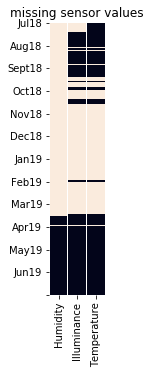

In [16]:
# We can now plot the missing value heatmap.
num_ticks=13 #tick number for Y-axis
plt.figure(figsize = (1,5))
ax = sns.heatmap(data.isnull(),cbar=False,
                 yticklabels=['Jul18','Aug18','Sept18','Oct18','Nov18','Dec18',
          'Jan19','Feb19','Mar19','Apr19','May19','Jun19',''])
ax.set_yticks(np.linspace(0,525600,num_ticks,dtype=np.int))
ax.set_title('missing sensor values')
plt.show()

###**4.2 Time-series Plots**

Text(0.5, 1.0, 'Humidity (%), Illuminance (Lux) and Temperature (deg C) plots')

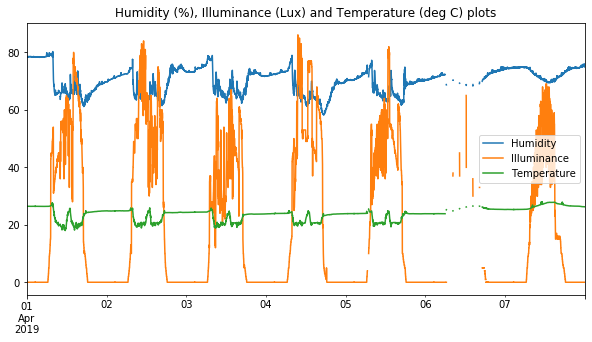

In [17]:
ax = data['2019-04-01 00:00':'2019-04-07 23:59'].plot(figsize=(10,5))
ax.set_title('Humidity (%), Illuminance (Lux) and Temperature (deg C) plots')

Text(0, 0.5, 'Relative Humidity (%)')

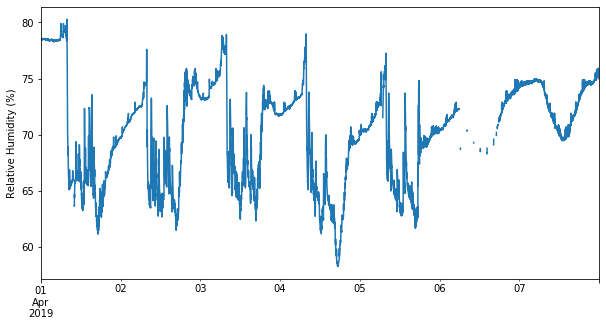

In [18]:
ax=data.loc['2019-04-01 00:00':'2019-04-07 23:59','Humidity'].plot(figsize=(10,5))
ax.set_ylabel('Relative Humidity (%)')

Text(0, 0.5, 'Temperature(deg C)')

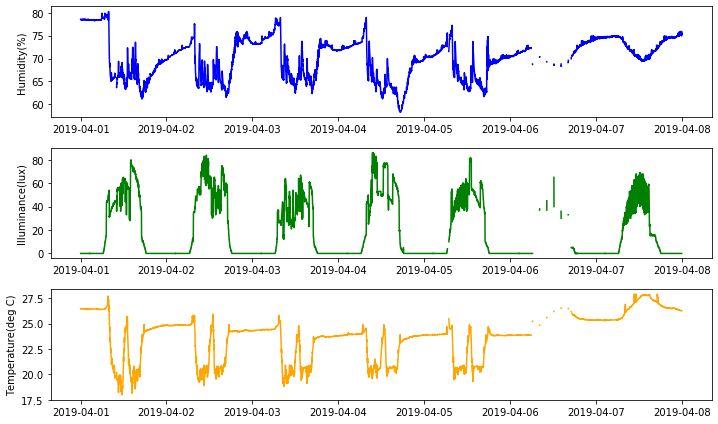

In [19]:
fig, axs = plt.subplots(3, figsize=(10,6), tight_layout=True)
axs[0].plot(data.loc['2019-04-01 00:00':'2019-04-07 23:59','Humidity'],color='blue')
axs[1].plot(data.loc['2019-04-01 00:00':'2019-04-07 23:59','Illuminance'],color='green')
axs[2].plot(data.loc['2019-04-01 00:00':'2019-04-07 23:59','Temperature'],color='orange')

axs[0].set_ylabel('Humidity(%)')
axs[1].set_ylabel('Illuminance(lux)')
axs[2].set_ylabel('Temperature(deg C)')

###**4.3 Histogram Plots**

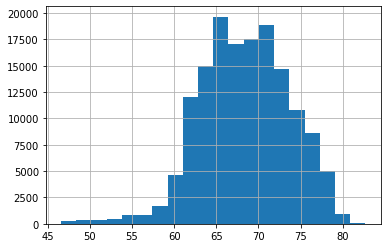

In [20]:
data.Humidity.hist(bins=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


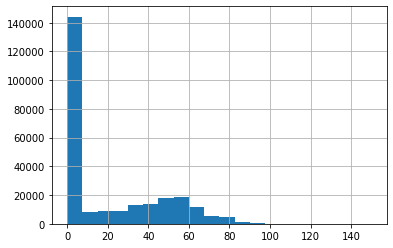

In [21]:
# Clipping values to remove outliers
data.Illuminance1=data.Illuminance.clip(lower=0, upper=150)
data.Illuminance1.hist(bins=20)

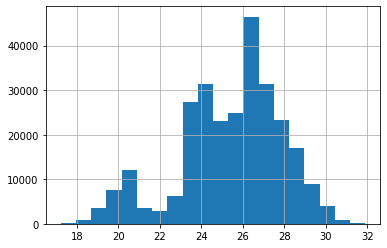

In [22]:
data.Temperature.hist(bins=20)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2018-07-01 00:00:00 to 2019-06-30 23:59:00
Freq: T
Data columns (total 3 columns):
Humidity       149776 non-null float64
Illuminance    257875 non-null float64
Temperature    275824 non-null float64
dtypes: float64(3)
memory usage: 36.0 MB




---


## **5.0 Re-sample the Data**

In [24]:
# Data are recorded in one-minute intervals.
data.head(5)

,Humidity,Illuminance,Temperature
2018-07-01 00:00:00,63.28,0.0,27.56
2018-07-01 00:01:00,63.29,0.0,27.56
2018-07-01 00:02:00,63.30,0.0,27.56
2018-07-01 00:03:00,63.31,0.0,27.56
2018-07-01 00:04:00,63.32,0.0,27.55


In [25]:
# Data can be resampled into 15-minute intervals.
data1=data.resample('15T').mean()
data1.head(5)

,Humidity,Illuminance,Temperature
2018-07-01 00:00:00,63.320667,0.0,27.558667
2018-07-01 00:15:00,63.314667,0.0,27.542667
2018-07-01 00:30:00,63.237333,0.0,27.542000
2018-07-01 00:45:00,63.280000,0.0,27.546667
2018-07-01 01:00:00,NaN,NaN,27.540000


Text(0.5, 1.0, 'Humidity (%), Illuminance (Lux) and Temperature (deg C) plots')

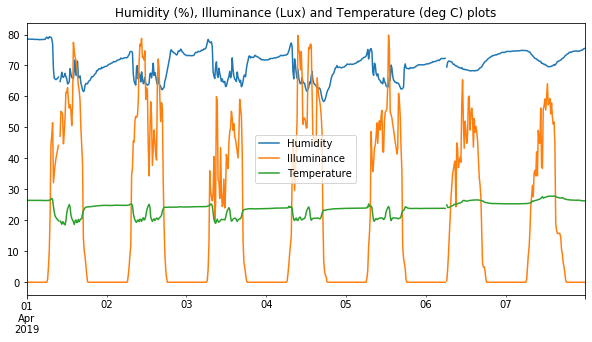

In [26]:
ax = data1['2019-04-01 00:00':'2019-04-07 23:59'].plot(figsize=(10,5))
ax.set_title('Humidity (%), Illuminance (Lux) and Temperature (deg C) plots')

In [28]:
# Data can be resampled into 1-hour intervals.
data1=data.resample('60T').mean()
data1.head(5)

,Humidity,Illuminance,Temperature
2018-07-01 00:00:00,63.290652,0.0,27.547500
2018-07-01 01:00:00,NaN,NaN,27.541897
2018-07-01 02:00:00,NaN,NaN,27.535517
2018-07-01 03:00:00,NaN,NaN,27.513333
2018-07-01 04:00:00,NaN,NaN,27.518621


Text(0.5, 1.0, 'Humidity (%), Illuminance (Lux) and Temperature (deg C) plots')

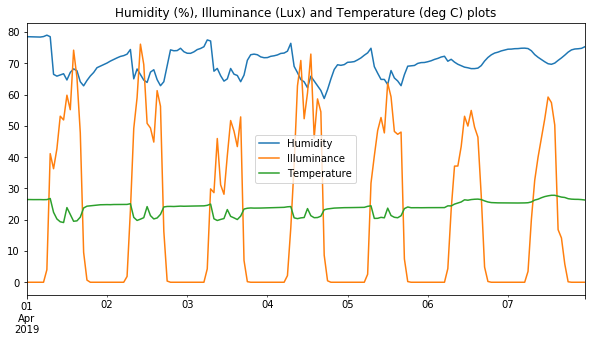

In [29]:
ax = data1['2019-04-01 00:00':'2019-04-07 23:59'].plot(figsize=(10,5))
ax.set_title('Humidity (%), Illuminance (Lux) and Temperature (deg C) plots')